Desafio: Comparar municípios para estabelecer metas de redução de óbito e acidentes em estradas em 2017. Utilização de algoritmos de análise de agrupamento para obter grupos de municípios comparáveis.

1) Analisar as variáveis para definir os agrupamentos
2) Listar variáveis relevantes e irrelevantes determinando um subconjunto adequado para aplicar o algoritmo
3) Selecionar e ajustar um modelo de análise de cluster
4) Validar o ajuste do modelo utilizando métricas de qualidade
5) Apresentar os resultados para equipe de negócio

Observação: existem variáveis que são dependentes de outras

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf 
from plotly import __version__
import missingno as msno 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import plotly.figure_factory as ff
cf.go_offline()
init_notebook_mode(connected=True)

In [339]:
df = pd.read_csv('C:\\Users\\tcortizo\\Documents\\Desafio Pleno\\dados.csv', sep=';', encoding='latin-1', low_memory=False)

df.columns

Index(['cidade', 'ibge', 'pib', 'mat1517', 'veiculos', 'motos', 'populacao',
       'pop1519', 'pop2024', 'pop2529', 'pop60p', 'jovem', 'rodovia'],
      dtype='object')

Para modelagem, é necessário que não haja variáveis linearmente dependente no dataset, pois isso irá aumentar o erro do ajuste do modelo. Com isso, foram retiradas as variáveis dependentes

In [318]:
df.head(10)

cidade     ibge      pib  mat1517  veiculos  motos  \
0              Adamantina  3500105   753020       95     22266   5415   
1                  Adolfo  3500204    67123       81      1737    315   
2                   Aguaí  3500303   619843       57     16229   4558   
3          Águas da Prata  3500402   104041       45      3724    765   
4        Águas de Lindóia  3500501   299599       60     10242   2946   
5  Águas de Santa Bárbara  3500550   121546       65      2947    443   
6      Águas de São Pedro  3500600    86655      129      2101    277   
7                  Agudos  3500709  1880838       74     16089   3791   
8                Alambari  3500758    64864       74      1672    489   
9       Alfredo Marcondes  3500808    53678       71      1809    340   

   populacao  pop1519  pop2024  pop2529  pop60p  jovem  rodovia  
0      33843     2390     2676     2617      19   7683     23.0  
1       3524      255      272      269      17    796      4.0  
2      33181     2764     2937     3021      12   8723     63.0  
3       7651      544      601      586      19   1732     27.0  
4      17610     1324     1341     1413      16   4077      7.0  
5       5700      479      429      415      16   1323     48.0  
6       2834      201      195      179      25    575      5.0  
7      35022     2996     3051     3004      12   9051     48.0  
8       5150      466      452      467      12   1386     46.0  
9       3905      273      306      287      21    866     11.0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
cidade       645 non-null object
ibge         645 non-null int64
pib          645 non-null int64
mat1517      645 non-null int64
veiculos     645 non-null int64
motos        645 non-null int64
populacao    645 non-null int64
pop1519      645 non-null int64
pop2024      645 non-null int64
pop2529      645 non-null int64
pop60p       645 non-null int64
jovem        645 non-null int64
rodovia      610 non-null float64
dtypes: float64(1), int64(11), object(1)
memory usage: 65.6+ KB


In [5]:
df['rodovia'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Rodovia')

In [6]:
df['jovem'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População Jovem')

In [7]:
df['pop60p'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Porcentagem População acima de 60 anos')

In [8]:
df['motos'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Motos')

In [9]:
df['veiculos'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Veiculos')

In [10]:
df['pop1519'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População 15 a 19 anos')

In [11]:
df['pib'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Pib')

In [12]:
df['populacao'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População Geral')

In [13]:
df['pop1519'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 15 a 19 anos Geral')

In [14]:
df['pop2024'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 20 a 24 anos Geral')

In [15]:
df['pop2529'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 25 a 29 anos Geral')

In [188]:
df_corr = pd.DataFrame(df, columns = ['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529','pop60p', 'rodovia'])

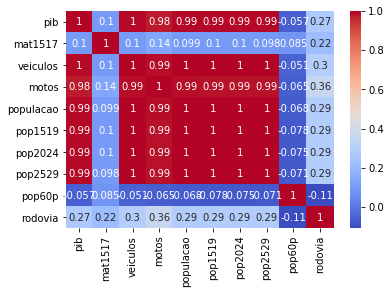

In [58]:
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



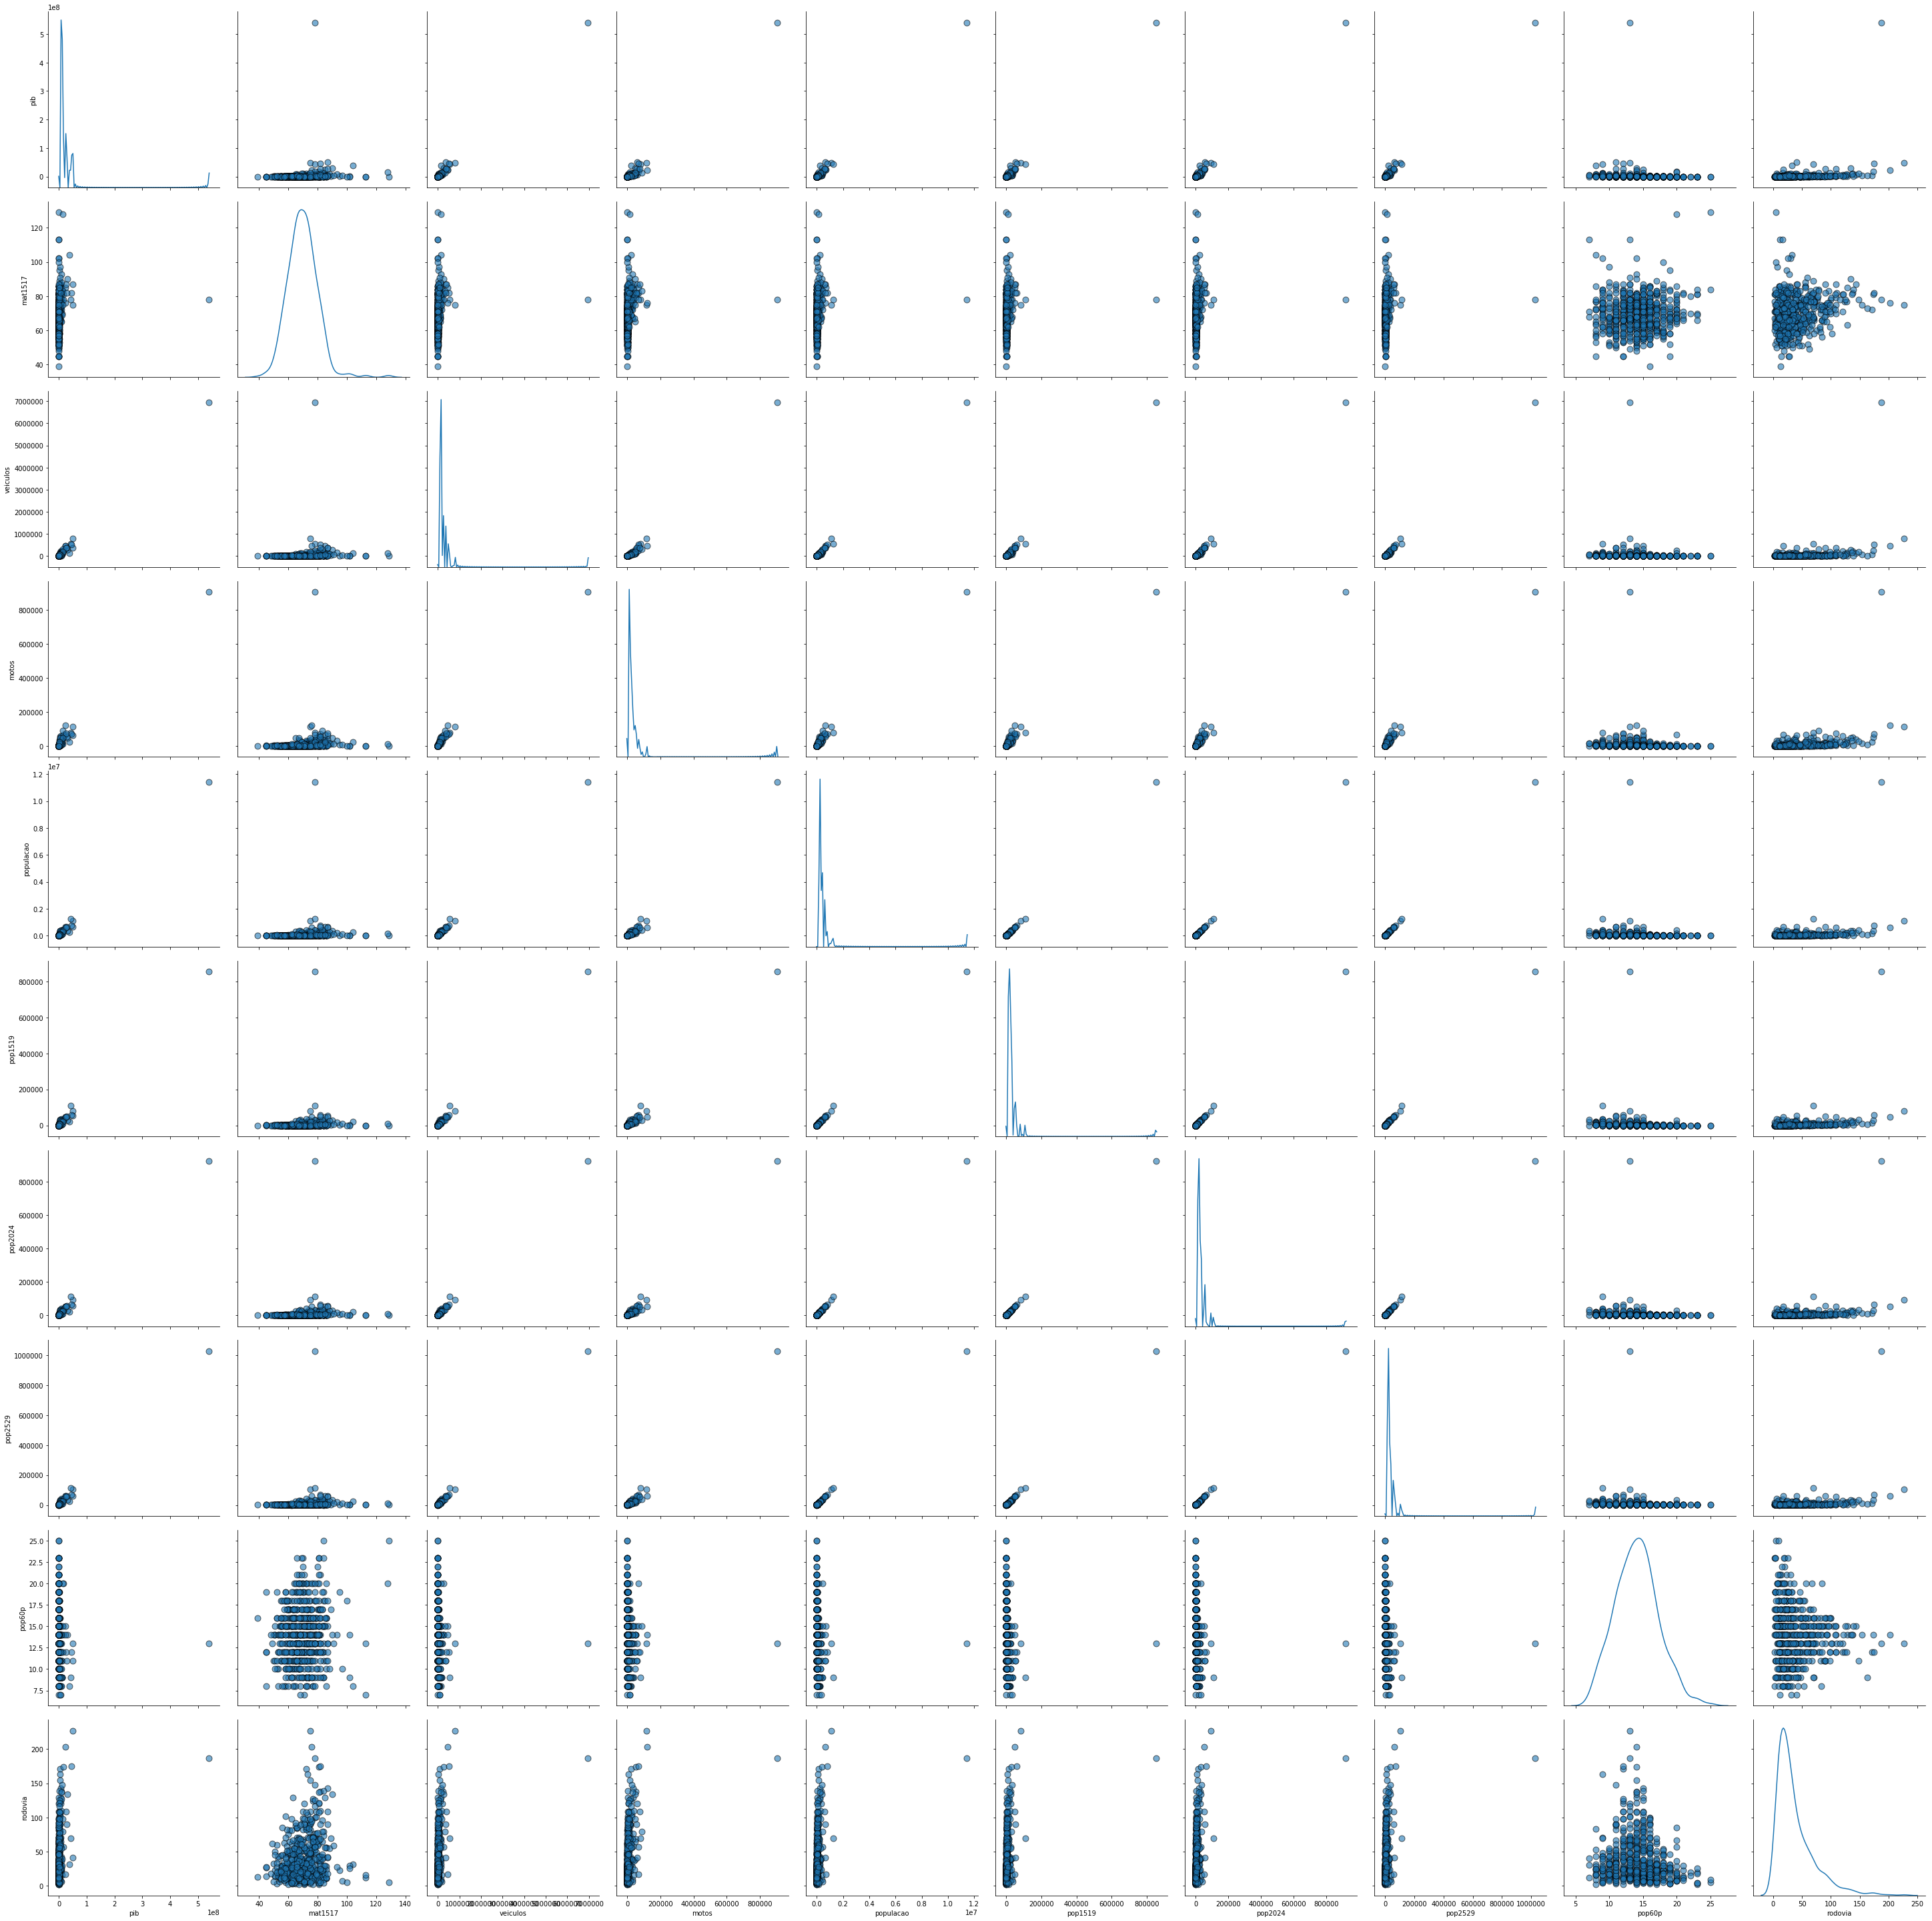

In [18]:
sns.pairplot(df_corr, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [19]:
df[['pop1519', 'pop2024','pop2529']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Quantidade',
    yTitle='(%) população',
    title='Distribuição População de 15 a 29 anos')

In [20]:
df[['veiculos', 'motos']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Quantidade',
    yTitle='(%) veiculos e motos',
    title='Distribuição Veiculos e Motos')

In [21]:
df.iplot(
    x='populacao',
    y='pib',
    # Specify the category
    categories='cidade',
    xTitle='Populacao',
    yTitle='Pib',
    title='Populacao x Pib por Cidade')

df[['pop1519', 'pop2024']].iplot(secondary_y='pop2024', secondary_y_title='População 20 a 24 anos',
    kind='box', yTitle='População de 15 a 19 anos', title='Comparação')

# Imputação dos dados faltantes

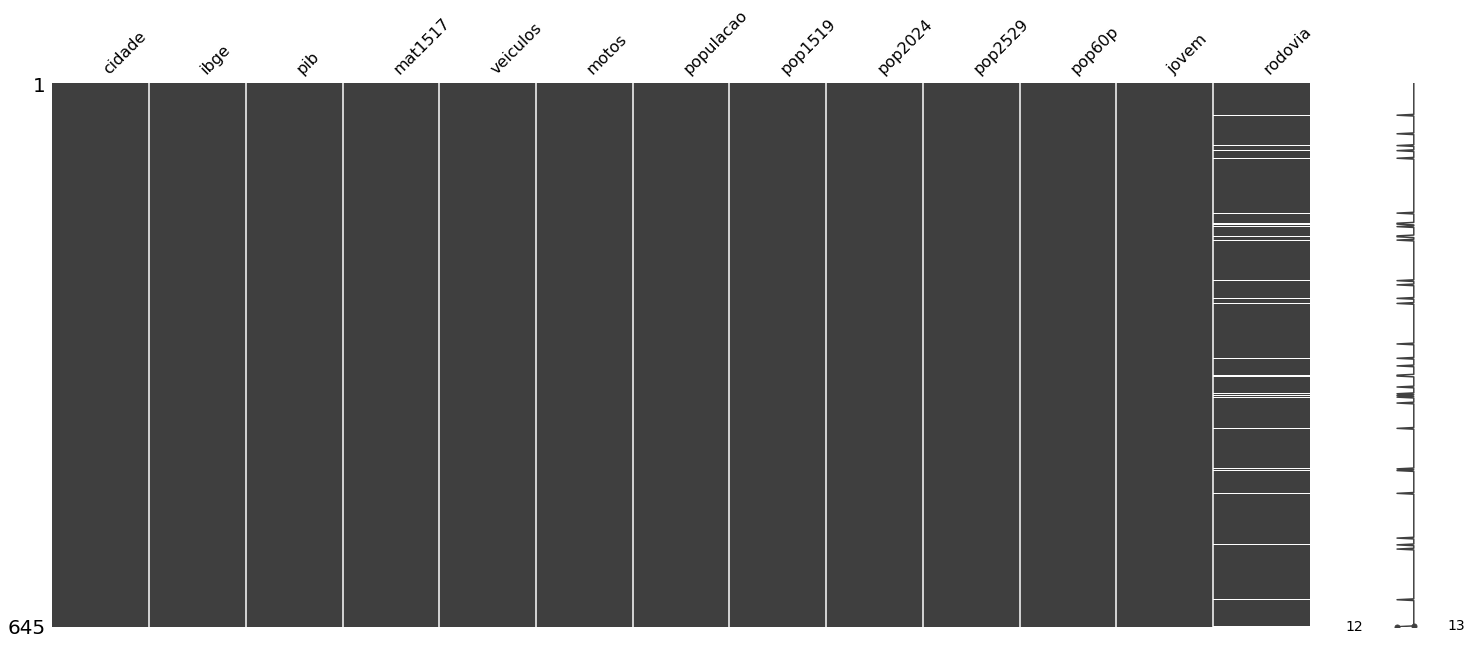

In [340]:
msno.matrix(df)

In [341]:
df.isnull().sum().sort_values(ascending=False)

rodovia      35
jovem         0
pop60p        0
pop2529       0
pop2024       0
pop1519       0
populacao     0
motos         0
veiculos      0
mat1517       0
pib           0
ibge          0
cidade        0
dtype: int64

In [342]:
df.fillna(df.median(), inplace=True)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
cidade       645 non-null object
ibge         645 non-null int64
pib          645 non-null int64
mat1517      645 non-null int64
veiculos     645 non-null int64
motos        645 non-null int64
populacao    645 non-null int64
pop1519      645 non-null int64
pop2024      645 non-null int64
pop2529      645 non-null int64
pop60p       645 non-null int64
jovem        645 non-null int64
rodovia      645 non-null float64
dtypes: float64(1), int64(11), object(1)
memory usage: 65.6+ KB


In [193]:
df_corr = pd.DataFrame(df, columns = ['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529','pop60p', 'rodovia'])

# Como as variáveis tem dimensões diferentes, iremos normalizar elas

In [226]:
scaler = preprocessing.StandardScaler().fit(df[['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529', 'pop60p', 'jovem', 'rodovia']])

In [227]:
df[['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529', 'pop60p', 'jovem', 'rodovia']] = scaler.transform(df[['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529', 'pop60p', 'jovem', 'rodovia']])

In [228]:
df['mat1517'].describe()

count    6.450000e+02
mean     2.041433e-16
std      1.000776e+00
min     -3.035088e+00
25%     -6.678202e-01
50%     -7.600335e-02
75%      6.144496e-01
max      5.842165e+00
Name: mat1517, dtype: float64

In [229]:
df.head()

cidade     ibge       pib   mat1517  veiculos     motos  \
0        Adamantina  3500105 -0.077389  2.488536 -0.052046 -0.044484   
1            Adolfo  3500204 -0.108884  1.107630 -0.125221 -0.179877   
2             Aguaí  3500303 -0.083504 -1.259637 -0.073565 -0.067236   
3    Águas da Prata  3500402 -0.107188 -2.443271 -0.118138 -0.167931   
4  Águas de Lindóia  3500501 -0.098209 -0.963729 -0.094905 -0.110030   

   populacao   pop1519   pop2024   pop2529    pop60p     jovem   rodovia  
0  -0.068703 -0.080072 -0.074798 -0.077037  1.535967 -0.077232 -0.442272  
1  -0.134320 -0.141731 -0.139255 -0.133571  0.908148 -0.137938 -1.028729  
2  -0.070135 -0.069271 -0.067800 -0.067310 -0.661400 -0.068064  0.792375  
3  -0.125388 -0.133385 -0.130434 -0.125939  1.535967 -0.129688 -0.318807  
4  -0.103835 -0.110858 -0.110593 -0.106026  0.594238 -0.109017 -0.936130

# Analisando os Dados depois da Normalização

In [39]:
df['rodovia'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Rodovia')

In [40]:
df['jovem'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População Jovem')

In [41]:
df['pop60p'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Porcentagem População acima de 60 anos')

In [42]:
df['motos'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Motos')

In [230]:
df_agrup = pd.DataFrame(df, columns = ['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529','pop60p', 'rodovia'])

In [231]:
df_agrup.head()

pib   mat1517  veiculos     motos  populacao   pop1519   pop2024  \
0 -0.077389  2.488536 -0.052046 -0.044484  -0.068703 -0.080072 -0.074798   
1 -0.108884  1.107630 -0.125221 -0.179877  -0.134320 -0.141731 -0.139255   
2 -0.083504 -1.259637 -0.073565 -0.067236  -0.070135 -0.069271 -0.067800   
3 -0.107188 -2.443271 -0.118138 -0.167931  -0.125388 -0.133385 -0.130434   
4 -0.098209 -0.963729 -0.094905 -0.110030  -0.103835 -0.110858 -0.110593   

    pop2529    pop60p   rodovia  
0 -0.077037  1.535967 -0.442272  
1 -0.133571  0.908148 -1.028729  
2 -0.067310 -0.661400  0.792375  
3 -0.125939  1.535967 -0.318807  
4 -0.106026  0.594238 -0.936130

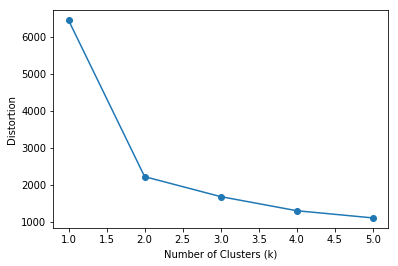

In [232]:
distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(df_agrup)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [233]:
# use the best K from elbow method
model = KMeans(
    n_clusters=3,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(df_agrup)

y = model.predict(df_agrup)

In [234]:

import scipy.cluster.hierarchy as hier

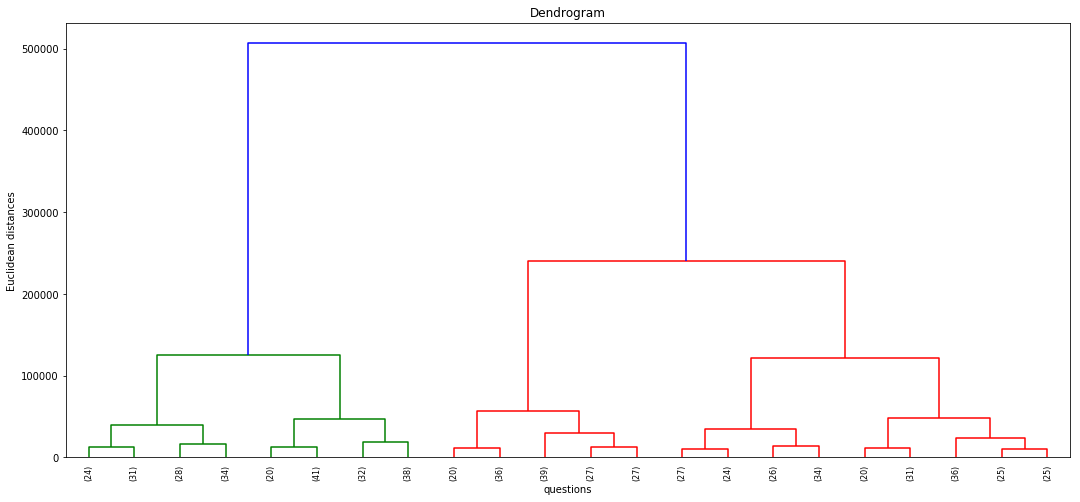

In [258]:
plt.figure(figsize=(18,8))
dendrogram = hier.dendrogram(hier.linkage(df.drop('cidade', axis=1), method = 'ward'), get_leaves=True, leaf_rotation=90., leaf_font_size=8., 
                              truncate_mode='lastp', p=22, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

In [278]:
labels = df['cidade']

In [279]:
labels

0                  Adamantina
1                      Adolfo
2                       Aguaí
3              Águas da Prata
4            Águas de Lindóia
5      Águas de Santa Bárbara
6          Águas de São Pedro
7                      Agudos
8                    Alambari
9           Alfredo Marcondes
10                     Altair
11                Altinópolis
12                Alto Alegre
13                   Alumínio
14           Álvares Florence
15            Álvares Machado
16         Álvaro de Carvalho
17                Alvinlândia
18                  Americana
19        Américo Brasiliense
20          Américo de Campos
21                     Amparo
22                  Analândia
23                  Andradina
24                   Angatuba
25                    Anhembi
26                    Anhumas
27                  Aparecida
28          Aparecida d'Oeste
29                      Apiaí
                ...          
615                  Tremembé
616           Três Fronteiras
617       

In [280]:
labels = df['cidade']

p = len(df['cidade'])

                   
temp = {df['cidade'][iii]: df['cidade'][iii] for iii in range(len(df['cidade']))}
def llf(xx):
    return "{} - custom label!".format(temp)


In [282]:
plt.figure(1, figsize=(8,14), frameon=False, dpi=100)
dendrogram = hier.dendrogram(hier.linkage(df.drop('cidade', axis=1), method = 'ward'), leaf_label_func=llf ,labels=df['cidade']
,leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp', p=22, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

ValueError: Image size of 725x100619 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x1400 with 1 Axes>

# Análise de Agrupamento

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [112]:
df_agrup = df[['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529', 'pop60p', 'jovem', 'rodovia']]

In [126]:
from scipy.cluster.hierarchy import dendrogram, linkage


test = hierarchy.linkage(df_agrup, 'single')
plt.figure()
denograma = hierarchy.dendrogram(test)

# Agora vou fazer o plot 
hierarchy.set_link_color_palette(['m','c','y','k'])
fig, axes = plt.subplots(1,2, figsize=(15,10))
dn1 = hierarchy.dendrogram(test, ax=axes[0], above_threshold_color='y', orientation='top')

dn2 = hierarchy.dendrogram(test, ax=axes[1], above_threshold_color='#bcbddc', orientation='right')
hierarchy.set_link_color_palette(None)
plt.show()

In [124]:
df.columns

Index(['cidade', 'ibge', 'pib', 'mat1517', 'veiculos', 'motos', 'populacao',
       'pop1519', 'pop2024', 'pop2529', 'pop60p', 'jovem', 'rodovia'],
      dtype='object')

NameError: name 'xmax' is not defined

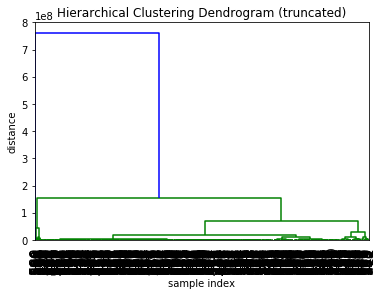

<Figure size 1440x720 with 0 Axes>

In [146]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(df_agrup,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    H_cluster,  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=14.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.figure(figsize=(20,10))
plt.axis()
plt.show()

In [147]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    df_agrup,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()


ValueError: Linkage matrix 'Z' must have 4 columns.

<Figure size 540x360 with 0 Axes>

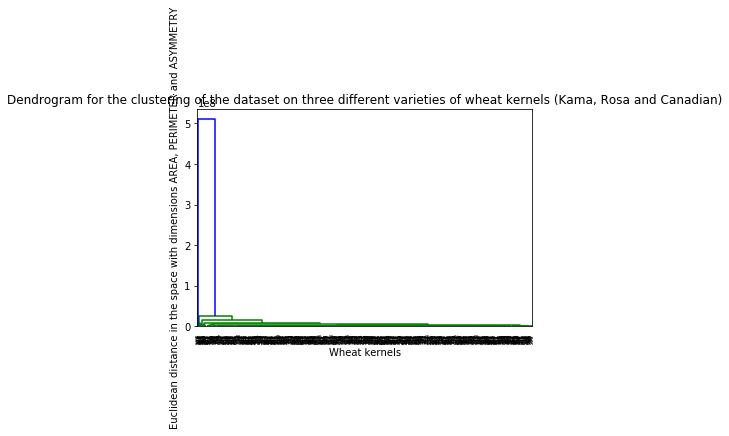

<Figure size 864x216 with 0 Axes>

NameError: name 'getClusterAssignments' is not defined

In [145]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(df_agrup, method = 'median')
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset on three different varieties of wheat kernels (Kama, Rosa and Canadian)')
plt.xlabel('Wheat kernels')
plt.ylabel('Euclidean distance in the space with dimensions AREA, PERIMETER and ASYMMETRY');
plt.figure(figsize=(12,3))
plt.show()

y_pred = getClusterAssignments(df_agrup, den)

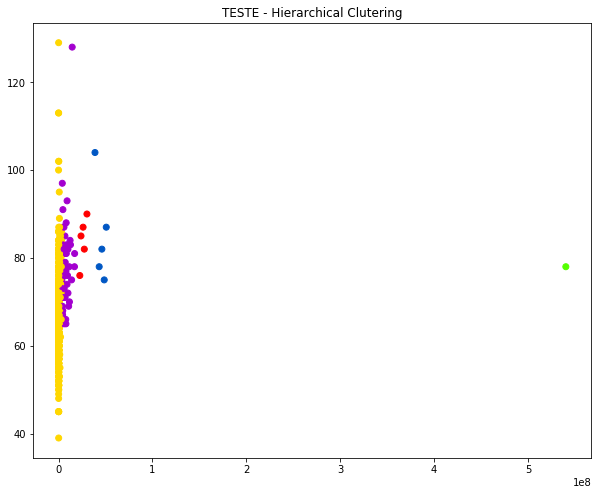

In [128]:
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(df_agrup.iloc[:,0], df_agrup.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('TESTE - Hierarchical Clutering')
plt.show()

In [113]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

In [114]:
km = KMeans(n_clusters=3)
km.fit(df_agrup)
km.predict(df_agrup)
labels = km.labels_

In [115]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
          c=labels.astype(np.float), edgecolor="k", s=50)
plt.title("K Means", fontsize=14)

IndentationError: unexpected indent (<ipython-input-115-96120c0222e6>, line 3)

In [148]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [160]:
from scipy.cluster.hierarchy import fcluster

In [155]:
clust_dist = linkage(df_agrup, 'average', 'euclidean')

In [159]:
k = 4

In [161]:
labels = fcluster(clust_dist, k, criterion = 'maxclust')

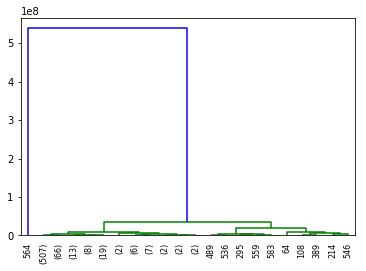

In [158]:
DF = dendrogram(clust_dist, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp', p=22, show_leaf_counts=True)

# Tentativa Sexta

In [319]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [320]:
df = df.drop('ibge', axis=1)

In [321]:
df = df.set_index('cidade')

In [322]:
df

pib  mat1517  veiculos  motos  populacao  pop1519  \
cidade                                                                          
Adamantina               753020       95     22266   5415      33843     2390   
Adolfo                    67123       81      1737    315       3524      255   
Aguaí                    619843       57     16229   4558      33181     2764   
Águas da Prata           104041       45      3724    765       7651      544   
Águas de Lindóia         299599       60     10242   2946      17610     1324   
Águas de Santa Bárbara   121546       65      2947    443       5700      479   
Águas de São Pedro        86655      129      2101    277       2834      201   
Agudos                  1880838       74     16089   3791      35022     2996   
Alambari                  64864       74      1672    489       5150      466   
Alfredo Marcondes         53678       71      1809    340       3905      273   
Altair                    89780       63      1188    117       3883      326   
Altinópolis              306746       67      7685    681      15581     1274   
Alto Alegre               74194       67      2015    381       4081      280   
Alumínio                1601243       74      6107    841      17177     1487   
Álvares Florence          96972       70      1589    299       3812      262   
Álvares Machado          314561       69     11243   3127      23566     1974   
Álvaro de Carvalho        36947       76       998    169       4763      297   
Alvinlândia               35027       62      1059    158       3055      273   
Americana               9084739       93    149688  29994     217932    15516   
Américo Brasiliense      570593       74     19021   4424      36240     3127   
Américo de Campos         67507       84      2908    544       5720      427   
Amparo                  3025036       84     44219  12828      67048     4909   
Analândia                115428       55      1854    251       4468      358   
Andradina               1836095       78     35653  11224      55594     4062   
Angatuba                 656895       58      9753   2422      22886     1946   
Anhembi                  100219       65      1717    187       5956      538   
Anhumas                   52697       63      1449    269       3807      328   
Aparecida                678021       71     18422   3874      35220     2781   
Aparecida d'Oeste         64153       69      2496    492       4352      331   
Apiaí                    559383       70      7829   2383      24917     2530   
...                         ...      ...       ...    ...        ...      ...   
Tremembé                 507521       52     15231   3621      42583     3335   
Três Fronteiras           71988       67      2816    721       5465      423   
Tuiuti                   105934       66      2497    682       6126      443   
Tupã                    1303523       85     44309  14149      63259     4391   
Tupi Paulista            210674       83      7960   1764      14548      913   
Turiúba                   32950       80       914    182       1927      129   
Turmalina                 32828       66       929    120       1924      142   
Ubarana                  268293       65      2240    401       5523      484   
Ubatuba                 1251888       71     31375  11067      81784     7398   
Ubirajara                 48917       71      1795    345       4498      367   
Uchoa                    220125       64      4896   1035       9539      684   
União Paulista            35069       63       879    178       1642      128   
Urânia                   141314       62      5368   1179       8775      610   
Uru                       21326      100       647    110       1235       84   
Urupês                   214754       87      7832   1466      12855      902   
Valentim Gentil          255502       67      6479   1782      11564      889   
Valinhos                4646972       91     81536  11923  

ValueError: The condensed distance matrix must contain only finite values.

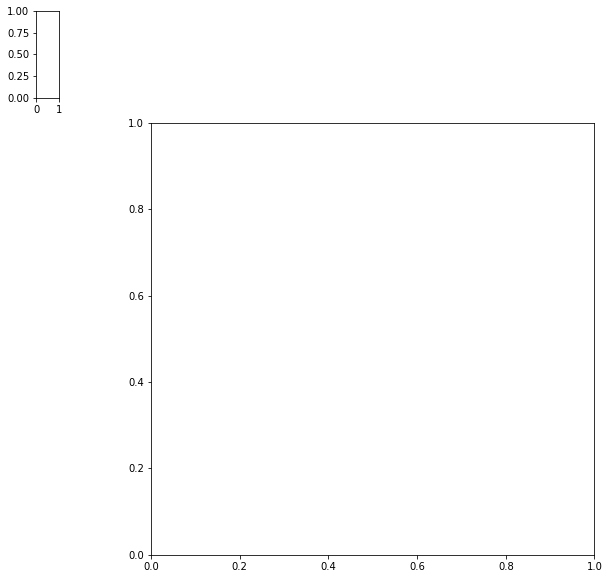

In [323]:
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1)

In [324]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

ValueError: The condensed distance matrix must contain only finite values.

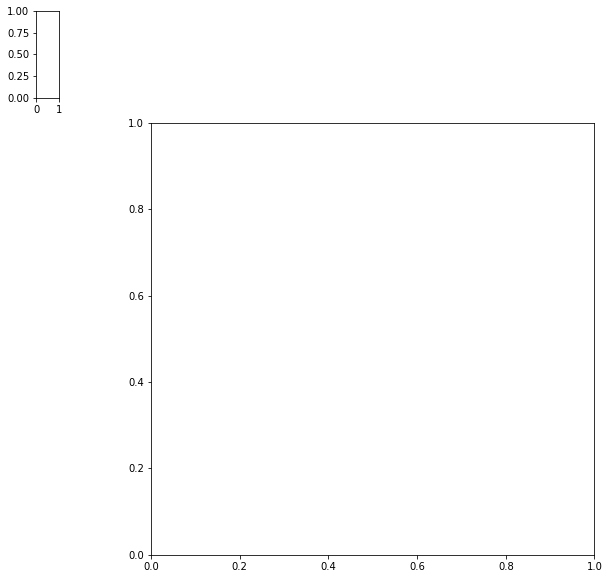

In [325]:
sns.clustermap(df, standard_scale=1)

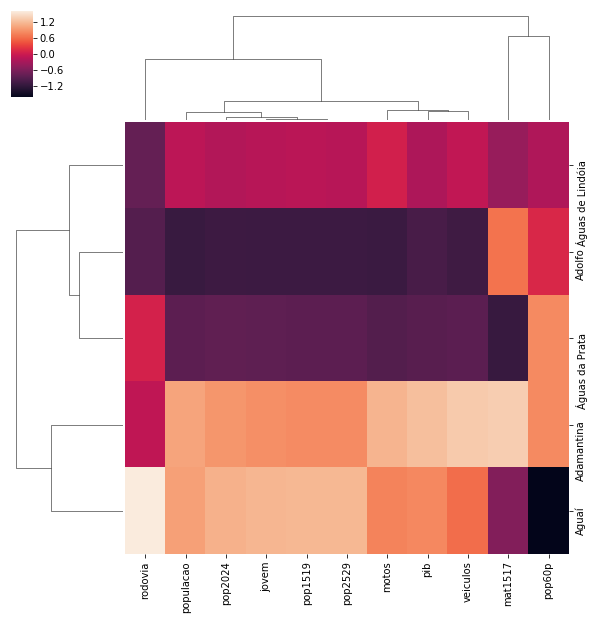

In [301]:
sns.clustermap(df, z_score=1)

In [327]:
del df.index.name
df

pib  mat1517  veiculos  motos  populacao  pop1519  \
Adamantina               753020       95     22266   5415      33843     2390   
Adolfo                    67123       81      1737    315       3524      255   
Aguaí                    619843       57     16229   4558      33181     2764   
Águas da Prata           104041       45      3724    765       7651      544   
Águas de Lindóia         299599       60     10242   2946      17610     1324   
Águas de Santa Bárbara   121546       65      2947    443       5700      479   
Águas de São Pedro        86655      129      2101    277       2834      201   
Agudos                  1880838       74     16089   3791      35022     2996   
Alambari                  64864       74      1672    489       5150      466   
Alfredo Marcondes         53678       71      1809    340       3905      273   
Altair                    89780       63      1188    117       3883      326   
Altinópolis              306746       67      7685    681      15581     1274   
Alto Alegre               74194       67      2015    381       4081      280   
Alumínio                1601243       74      6107    841      17177     1487   
Álvares Florence          96972       70      1589    299       3812      262   
Álvares Machado          314561       69     11243   3127      23566     1974   
Álvaro de Carvalho        36947       76       998    169       4763      297   
Alvinlândia               35027       62      1059    158       3055      273   
Americana               9084739       93    149688  29994     217932    15516   
Américo Brasiliense      570593       74     19021   4424      36240     3127   
Américo de Campos         67507       84      2908    544       5720      427   
Amparo                  3025036       84     44219  12828      67048     4909   
Analândia                115428       55      1854    251       4468      358   
Andradina               1836095       78     35653  11224      55594     4062   
Angatuba                 656895       58      9753   2422      22886     1946   
Anhembi                  100219       65      1717    187       5956      538   
Anhumas                   52697       63      1449    269       3807      328   
Aparecida                678021       71     18422   3874      35220     2781   
Aparecida d'Oeste         64153       69      2496    492       4352      331   
Apiaí                    559383       70      7829   2383      24917     2530   
...                         ...      ...       ...    ...        ...      ...   
Tremembé                 507521       52     15231   3621      42583     3335   
Três Fronteiras           71988       67      2816    721       5465      423   
Tuiuti                   105934       66      2497    682       6126      443   
Tupã                    1303523       85     44309  14149      63259     4391   
Tupi Paulista            210674       83      7960   1764      14548      913   
Turiúba                   32950       80       914    182       1927      129   
Turmalina                 32828       66       929    120       1924      142   
Ubarana                  268293       65      2240    401       5523      484   
Ubatuba                 1251888       71     31375  11067      81784     7398   
Ubirajara                 48917       71      1795    345       4498      367   
Uchoa                    220125       64      4896   1035       9539      684   
União Paulista            35069       63       879    178       1642      128   
Urânia                   141314       62      5368   1179       8775      610   
Uru                       21326      100       647    110       1235       84   
Urupês                   214754       87      7832   1466      12855      902   
Valentim Gentil          255502       67      6479   1782      11564      889   
Valinhos                4646972       91     81536  11923     112978     8082   
Valparaíso               591540       66      9066   1589  

ValueError: The condensed distance matrix must contain only finite values.

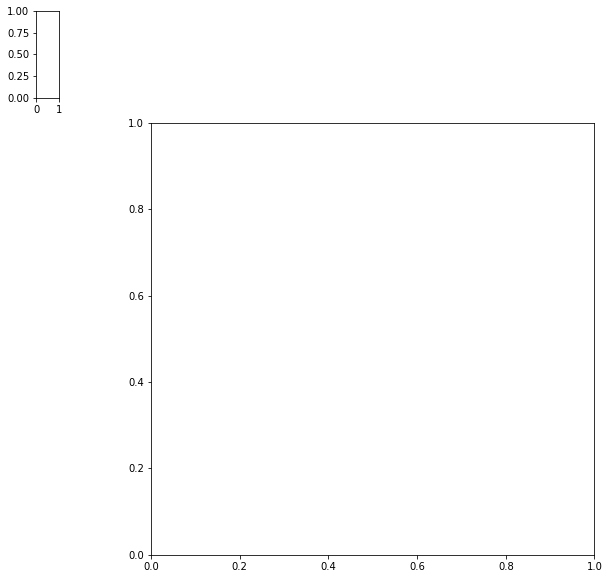

In [328]:
sns.clustermap(df)

In [329]:
Z = linkage(df, 'ward')

ValueError: The condensed distance matrix must contain only finite values.

In [330]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 1.6397596045894314, 1.6397596045894314, 0.0],
  [0.0, 1.8609535747301016, 1.8609535747301016, 0.0],
  [0.0, 2.6363949353914147, 2.6363949353914147, 1.8609535747301016],
  [1.6397596045894314,
   5.393646766006835,
   5.393646766006835,
   2.6363949353914147]],
 'ivl': ['Vista Alegre do Alto',
  'Vitória Brasil',
  'Votorantim',
  'Votuporanga',
  'Zacarias'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['g', 'r', 'r', 'b']}

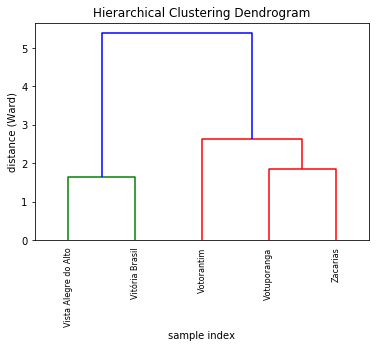

In [331]:
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=8., truncate_mode='lastp', p=22, show_leaf_counts=True)


In [344]:
df = df.set_index('cidade')
del df.index.name
df


ibge      pib  mat1517  veiculos  motos  populacao  \
Adamantina              3500105   753020       95     22266   5415      33843   
Adolfo                  3500204    67123       81      1737    315       3524   
Aguaí                   3500303   619843       57     16229   4558      33181   
Águas da Prata          3500402   104041       45      3724    765       7651   
Águas de Lindóia        3500501   299599       60     10242   2946      17610   
Águas de Santa Bárbara  3500550   121546       65      2947    443       5700   
Águas de São Pedro      3500600    86655      129      2101    277       2834   
Agudos                  3500709  1880838       74     16089   3791      35022   
Alambari                3500758    64864       74      1672    489       5150   
Alfredo Marcondes       3500808    53678       71      1809    340       3905   
Altair                  3500907    89780       63      1188    117       3883   
Altinópolis             3501004   306746       67      7685    681      15581   
Alto Alegre             3501103    74194       67      2015    381       4081   
Alumínio                3501152  1601243       74      6107    841      17177   
Álvares Florence        3501202    96972       70      1589    299       3812   
Álvares Machado         3501301   314561       69     11243   3127      23566   
Álvaro de Carvalho      3501400    36947       76       998    169       4763   
Alvinlândia             3501509    35027       62      1059    158       3055   
Americana               3501608  9084739       93    149688  29994     217932   
Américo Brasiliense     3501707   570593       74     19021   4424      36240   
Américo de Campos       3501806    67507       84      2908    544       5720   
Amparo                  3501905  3025036       84     44219  12828      67048   
Analândia               3502002   115428       55      1854    251       4468   
Andradina               3502101  1836095       78     35653  11224      55594   
Angatuba                3502200   656895       58      9753   2422      22886   
Anhembi                 3502309   100219       65      1717    187       5956   
Anhumas                 3502408    52697       63      1449    269       3807   
Aparecida               3502507   678021       71     18422   3874      35220   
Aparecida d'Oeste       3502606    64153       69      2496    492       4352   
Apiaí                   3502705   559383       70      7829   2383      24917   
...                         ...      ...      ...       ...    ...        ...   
Tremembé                3554805   507521       52     15231   3621      42583   
Três Fronteiras         3554904    71988       67      2816    721       5465   
Tuiuti                  3554953   105934       66      2497    682       6126   
Tupã                    3555000  1303523       85     44309  14149      63259   
Tupi Paulista           3555109   210674       83      7960   1764      14548   
Turiúba                 3555208    32950       80       914    182       1927   
Turmalina               3555307    32828       66       929    120       1924   
Ubarana                 3555356   268293       65      2240    401       5523   
Ubatuba                 3555406  1251888       71     31375  11067      81784   
Ubirajara               3555505    48917       71      1795    345       4498   
Uchoa                   3555604   220125       64      4896   1035       9539   
União Paulista          3555703    35069       63       879    178       1642   
Urânia                  3555802   141314       62      5368   1179       8775   
Uru                     3555901    21326      100       647    110       1235   
Urupês                  3556008   214754       87      7832   1466      12855   
Valentim Gentil         3556107   255502       67      6479   1782      11564   
Valinhos                3556206  4646972       91     81536  11923     112978   
Valparaíso              3556305   591540       66      906

In [371]:
Z = hierarchy.linkage(df, 'ward')

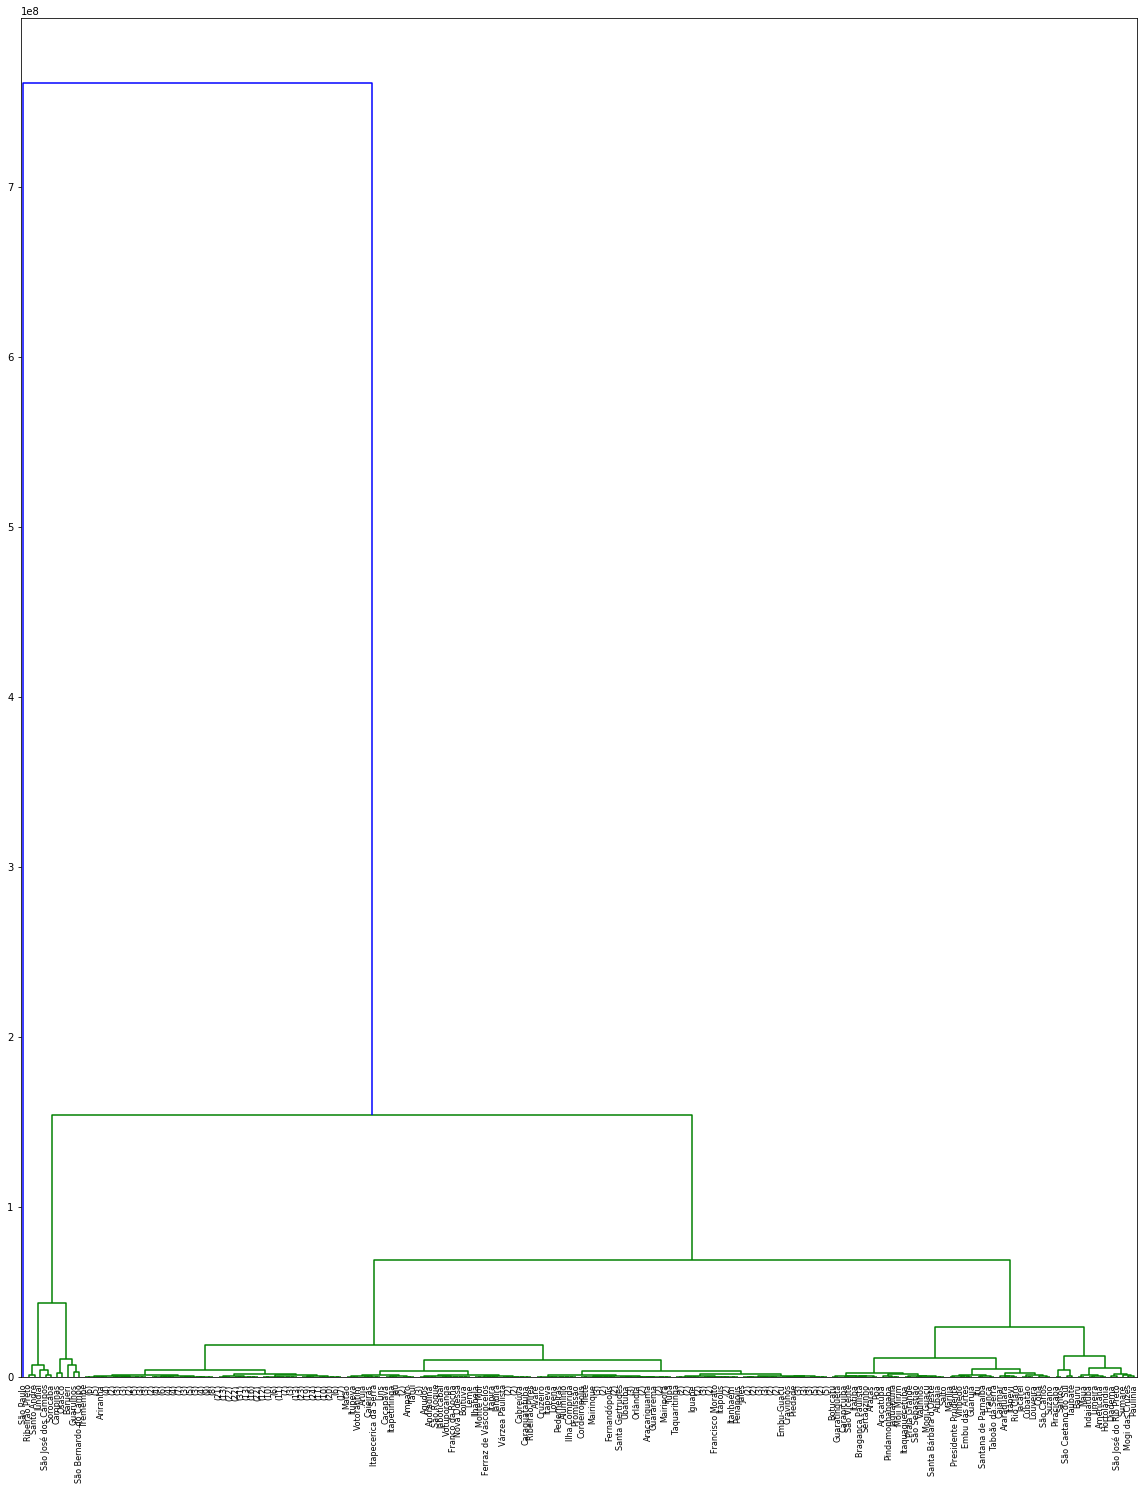

In [405]:
plt.figure(figsize=(20,25))
fig = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index, truncate_mode='lastp', p=200, show_leaf_counts=True)
plt.savefig("C:\\Users\\tcortizo\\Desktop\\test.jpg")

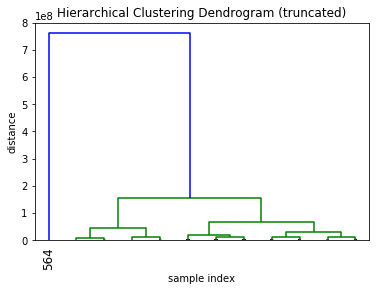

In [372]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [361]:
df = df.drop('ibge', axis=1)

In [382]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 8, depth=10)

array([11,  6,  2,  8,  3,  8,  8, 10,  6,  5,  8,  3,  6, 11,  8,  3,  4,
        4, 12,  2,  6, 10,  8, 10, 11,  8,  5, 11,  6,  2, 11, 12,  3,  8,
        6,  4, 12, 12,  4,  9,  4,  8,  2, 11, 10,  4, 10, 12,  7,  9,  9,
       11,  7,  4,  9,  9,  4,  6, 11, 11,  5,  6, 10,  3,  1,  2, 11, 12,
       10,  8,  9, 11,  8, 10,  2,  7,  3,  9, 10,  3,  5,  6,  9,  7,  5,
       12, 12,  6,  9,  3,  2,  7,  3,  9,  8, 10, 10,  3,  7,  3,  5, 10,
        6, 12, 11,  8,  3,  8,  1, 11, 11,  8,  2,  6,  2,  5,  8,  2,  7,
       11, 10, 12,  9,  2,  6,  3, 10,  8,  7,  3, 11,  7,  7,  9,  9, 11,
        7,  3,  7, 11,  8,  5,  8, 11,  7, 12, 11,  9,  5, 11, 12,  9, 11,
       12,  4,  9,  6,  2,  4,  7, 11,  9,  9,  8,  7,  3,  5,  4, 12, 11,
        5,  3, 11,  6,  7,  5,  3,  6,  7,  8, 11,  4, 10,  4,  5,  9,  6,
       12, 11, 10,  5,  8, 11,  5,  8,  7,  9,  6,  9,  5, 11,  3,  3,  3,
        9,  7,  4,  8, 11, 11, 12,  9, 11, 12,  1,  9,  5,  9,  2, 12,  7,
        8,  6,  2,  9,  9

In [381]:
k=2
fcluster(Z, k, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

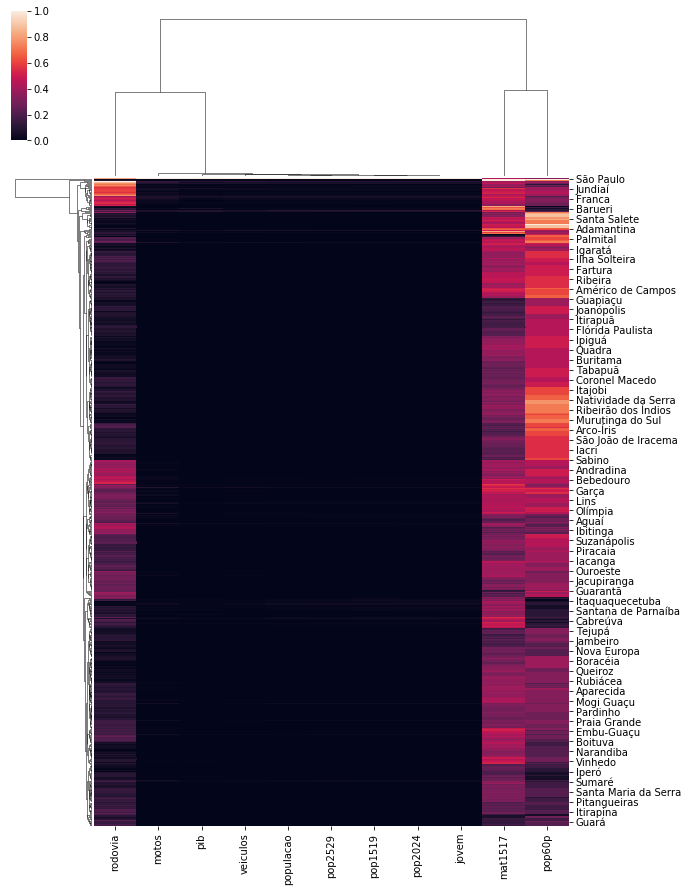

In [394]:
sns.clustermap(df, standard_scale=1, figsize=(10,15))

# Cluster

# Exportando Resultado

In [ ]:
medias.to_csv('medias.csv')